In [8]:
#Import everything you need
from astropy.io import fits
from astropy.table import Table, Column, hstack
from photutils import CircularAperture, CircularAnnulus, aperture_photometry
from astropy.modeling import models, fitting
import pdb
import numpy as np
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

### title

In [2]:
# Import all the files
hdu_filenames = glob.glob('//data1//tso_analysis//wlp8_sub_data//*.fits')
hdu_filenames

['//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I001.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I002.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I003.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I004.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I005.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I006.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I007.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I008.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I009.slp.fits',
 '//data1/

In [3]:
#Generate flux & time of each image for all aperture radii
center = (167,161)
t = Table(names=('Flux','Time','Aperture Radius'))
for hdus in hdu_filenames:
    hdu = fits.open(hdus)
    image = hdu[0].data
    image2d = image[0,:,:]
    mask = np.isnan(image2d) == True
    radius = np.arange(5,200,1)
    for r in radius:
        aperture = CircularAperture(center, r)
        phot_table = aperture_photometry(image2d, aperture, mask = mask)
        header = hdu[0].header
        time = [(header["NGROUP"] + 1) * header["TGROUP"] * (header["ON_NINT"] - 1)]
        a = [phot_table[0][0]]
        b = time
        c = r
        t.add_row([a,b,c])
    hdu.close()
t

Flux,Time,Aperture Radius
float64,float64,float64
11259.4485096,0.0,5.0
12945.3590564,0.0,6.0
15286.7688115,0.0,7.0
19035.1914068,0.0,8.0
24404.4468714,0.0,9.0
30668.6983373,0.0,10.0
37210.0983617,0.0,11.0
43924.3332615,0.0,12.0
52122.0708207,0.0,13.0


In [4]:
# Generate Standard deviation of all images for each aperture radii
# Generate Median flux of all images for each aperture radii (so that you can normalize standard deviation)
s = Table(names=('Median_Flux','St_Dev', 'Ap_Rad'))
for r in radius:
    indices = t['Aperture Radius'] == r
    st_dev = np.std(t["Flux"][indices])
    median_flux = np.median(t["Flux"][indices])
    s.add_row([median_flux,st_dev,r])
s

Median_Flux,St_Dev,Ap_Rad
float64,float64,float64
11402.1034837,89.0415995985,5.0
13116.5077302,122.709148813,6.0
15501.4850647,179.574991926,7.0
19325.9235549,216.285278943,8.0
24800.4946008,260.265355024,9.0
31167.6370867,321.180339028,10.0
37833.7314336,386.805846268,11.0
44658.9287596,464.972467869,12.0
52908.3200746,573.958515673,13.0


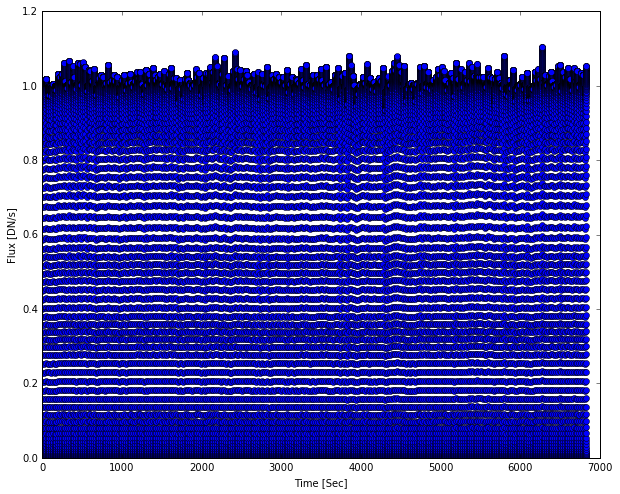

In [5]:
#Create light curve for all aperture radii
x = t['Time']
y = t['Flux']
normalized_y = y/np.median(y)
plt.plot(x, normalized_y, 'o')
plt.ylabel('Flux [DN/s]')
plt.xlabel('Time [Sec]')

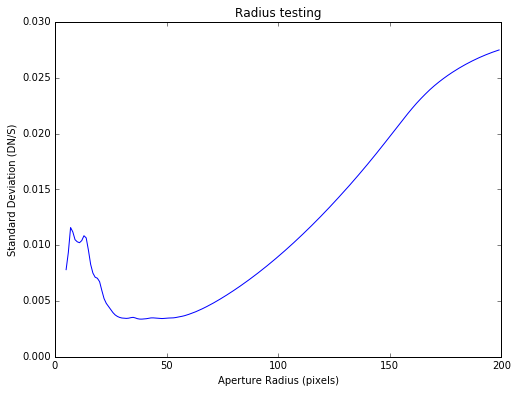

In [9]:
# Plot normalized standard deviation
u = s['Ap_Rad']
v = s['St_Dev']/s['Median_Flux']
plt.plot(u, v)
plt.ylabel('Standard Deviation (DN/S)')
plt.xlabel('Aperture Radius (pixels)')
plt.title('Radius testing')

In [7]:
# Find minimum deviation and the corresponding aperture radius
min_stdev = np.amin(v)
best_ap_rad = u[v.argmin()]
print "The minimum standard deviation is %f" % min_stdev
print "It occurs for the radius r = %f" % best_ap_rad

The minimum standard deviation is 0.003378
It occurs for the radius r = 39.000000


In [8]:
# Run the code for the best aperture radius
center = (167,161)
single_rad_data = Table(names=('Flux','Time'))
for hdus in hdu_filenames:
    hdu = fits.open(hdus)
    image = hdu[0].data
    image2d = image[0]
    mask = np.isnan(image2d) == True
    aperture = CircularAperture(center, r = 39)
    phot_table = aperture_photometry(image2d, aperture, mask = mask)
    header = hdu[0].header
    time = [(header["NGROUP"] + 1) * header["TGROUP"] * (header["ON_NINT"] - 1)]
    a = [phot_table[0][0]]
    b = time
    single_rad_data.add_row([a,b])
    hdu.close()
single_rad_data

Flux,Time
float64,float64
1648212.75321,0.0
1650047.36377,22.38012
1659086.06569,44.76024
1651010.50639,67.14036
1650322.02808,89.52048
1649950.18671,111.9006
1654365.84388,134.28072
1650819.66527,156.66084
1652072.12513,179.04096


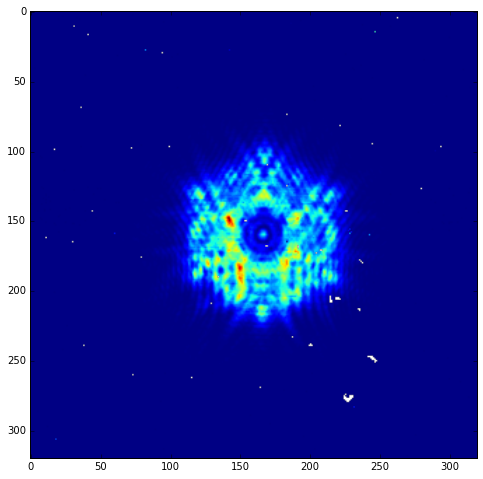

In [9]:
plt.imshow(image2d)  #ignore this line

In [10]:
import pdb 

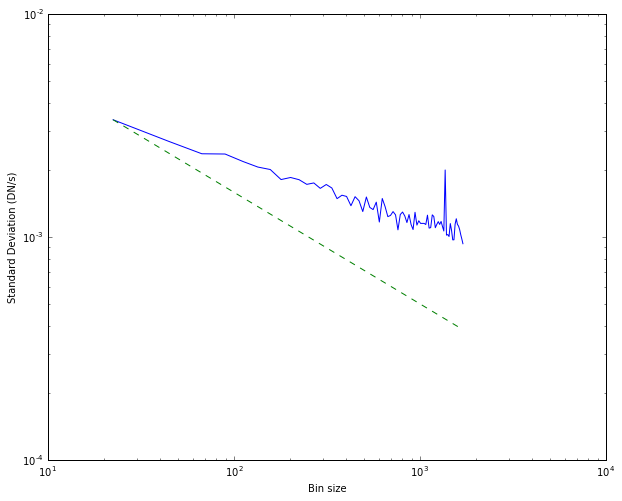

In [11]:
#My RMS vs. Bins code

stdev_array = []
time_array = []
bin_size_array = np.arange(1,77,1)
for bin_size in bin_size_array:
    flux_array = []
    for bins in range(0,306,bin_size):
        bin_start = bins
        bin_end   = bins + bin_size
        flux_in_one_bin = np.average(single_rad_data['Flux'][bin_start:bin_end])
        flux_array.append(flux_in_one_bin)
    norm_flux_array = flux_array/np.median(single_rad_data['Flux'][bin_start:bin_end])
    stdev_in_one_bin = np.std(norm_flux_array)
    stdev_array.append(stdev_in_one_bin)
    time_point = single_rad_data['Time'][bin_size] - single_rad_data['Time'][0]
    time_array.append(time_point)

model = stdev_array[0]/np.sqrt(bin_size_array)       
plt.loglog(time_array,stdev_array)
plt.loglog(time_array, model, '--')
plt.xlabel('Bin size')
plt.ylabel('Standard Deviation (DN/s)')

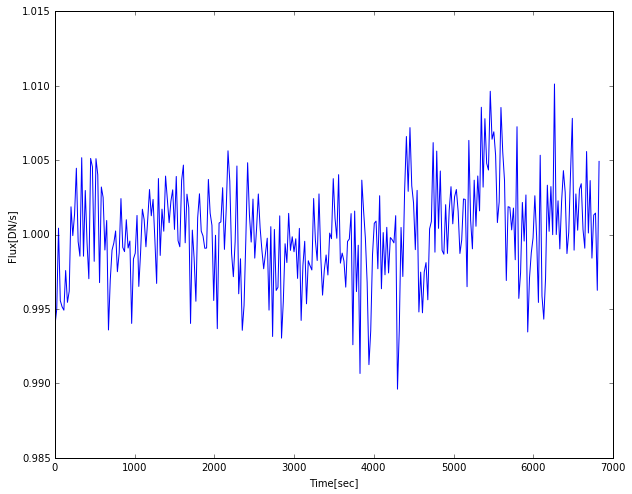

In [12]:
# Light curve of first data set without error bars
x = single_rad_data['Time']
y = single_rad_data['Flux']
first_data_plot = plt.plot(x, y/np.median(y))
plt.xlabel('Time[sec]')
plt.ylabel('Flux[DN/s]')

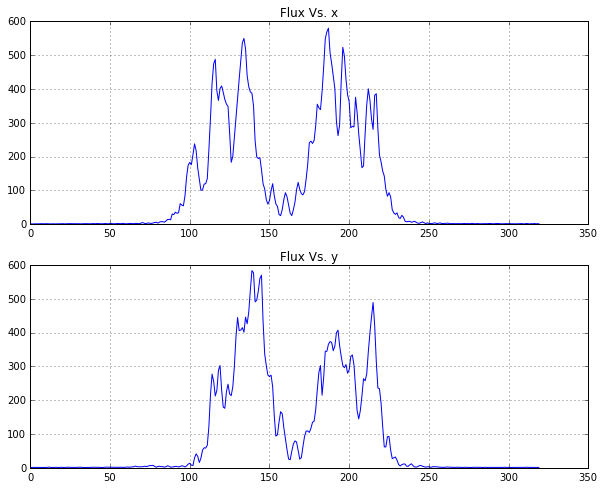

In [13]:
# slice the image horizontally & vertically through the center to measure amplitude, mean and st. dev of gaussian
plt.subplot(2,1,1)
plt.title("Flux Vs. x")
plt.plot(image2d[:,162])
plt.grid(True)
plt.subplot(2,1,2)
plt.title("Flux Vs. y")
plt.plot(image2d[164,:])
plt.grid(True)

In [14]:
# Create your x & y data for gaussian. This is basically the pixel plane of image and image2d gives the flux at every point. 
c, d = np.mgrid[:image2d.shape[0],:image2d.shape[1]]
image2d.shape[0]

320

In [15]:
d.shape # ignore this line

(320, 320)

In [16]:
# Create your gaussian model
center_x = 167
center_y = 161
box_width = 5
fit_g = fitting.LevMarLSQFitter()
gauss2D = models.Gaussian2D(amplitude = 100, x_mean = image2d.shape[1]/2, y_mean = image2d.shape[0]/2, x_stddev = 2, y_stddev = 2, theta = 0.0)
g = fit_g(gauss2D,c[center_y-box_width:center_y+box_width,center_x-box_width:center_x+box_width],d[center_y-box_width:center_y+box_width,center_x-box_width:center_x+box_width],image2d[center_y-box_width:center_y+box_width,center_x-box_width:center_x+box_width])
#the fitter function changes the parameters/inital conditions everytime it's called
g2 = fit_g(g,c[center_y-box_width:center_y+box_width,center_x-box_width:center_x+box_width],d[center_y-box_width:center_y+box_width,center_x-box_width:center_x+box_width],image2d[center_y-box_width:center_y+box_width,center_x-box_width:center_x+box_width])
print g2.parameters, g.parameters

[  3.99627721e+02   1.59793801e+02   1.66029330e+02   2.38676486e+00
   2.20826335e+00  -3.23027537e-01] [  3.99627748e+02   1.59793801e+02   1.66029329e+02   2.38676470e+00
   2.20826320e+00  -3.23026887e-01]


0.017801000013078799

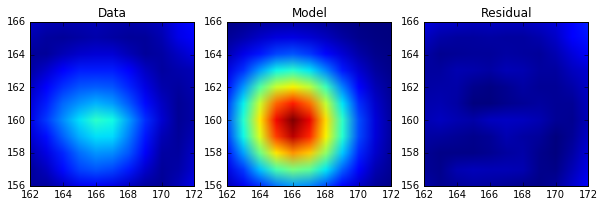

In [17]:
# fit the model to your data
plt.figure('figsize=12,12')
plt.subplot(1,3,1)
plt.xlim(167-5,167+5)
plt.ylim(161-5,161+5)
plt.imshow(image2d)
plt.title("Data")
plt.subplot(1,3,2)
plt.xlim(167-5,167+5)
plt.ylim(161-5,161+5)
plt.imshow(g2(c,d))
plt.title("Model")
plt.subplot(1,3,3)
plt.xlim(167-5,167+5)
plt.ylim(161-5,161+5)
plt.imshow(image2d - g2(c,d))
plt.title("Residual")

np.sum(image2d[161-5:161+5,167-5:167+5] - g2(c[161-5:161+5,167-5:167+5],d[161-5:161+5,167-5:167+5])) / image2d[161-5:161+5,167-5:167+5].sum()

In [18]:
x_values = []
y_values = []
for hdus in hdu_filenames:
    hdu = fits.open(hdus)
    image = hdu[0].data
    image2d = image[0]
    fit_g = fitting.LevMarLSQFitter()
    gauss2D = models.Gaussian2D(amplitude = 100, x_mean = image2d.shape[1]/2, y_mean = image2d.shape[0]/2, x_stddev = 2, y_stddev = 2, theta = 0.0)
    g = fit_g(gauss2D,c[161-5:161+5,167-5:167+5],d[161-5:161+5,167-5:167+5],image2d[161-5:161+5,167-5:167+5])
    g2 = fit_g(g,c[161-5:161+5,167-5:167+5],d[161-5:161+5,167-5:167+5],image2d[161-5:161+5,167-5:167+5])
    x_values.append(g2.x_mean)
    y_values.append(g2.y_mean)
    hdu.close()
separate_centers = zip(x_values,y_values)
separate_centers

[(Parameter('x_mean', value=160.079827987),
  Parameter('y_mean', value=165.971617196)),
 (Parameter('x_mean', value=160.078336314),
  Parameter('y_mean', value=165.967726257)),
 (Parameter('x_mean', value=160.082298893),
  Parameter('y_mean', value=165.985951897)),
 (Parameter('x_mean', value=160.099707659),
  Parameter('y_mean', value=165.971789812)),
 (Parameter('x_mean', value=160.113393037),
  Parameter('y_mean', value=166.023118601)),
 (Parameter('x_mean', value=160.11807665),
  Parameter('y_mean', value=165.984367804)),
 (Parameter('x_mean', value=160.125595962),
  Parameter('y_mean', value=165.952321604)),
 (Parameter('x_mean', value=160.112288917),
  Parameter('y_mean', value=165.929777848)),
 (Parameter('x_mean', value=160.116420148),
  Parameter('y_mean', value=165.994858272)),
 (Parameter('x_mean', value=160.101096735),
  Parameter('y_mean', value=165.98381595)),
 (Parameter('x_mean', value=160.102645989),
  Parameter('y_mean', value=165.996945262)),
 (Parameter('x_mean', v

In [19]:
# Generating flux using seperate centers (just more accurate)
fixed_center_rad = Table(names=('Flux','Time'))
for index, hdus in enumerate(hdu_filenames):
    hdu = fits.open(hdus)
    image = hdu[0].data
    image2d = image[0]
    mask = np.isnan(image2d) == True
    aperture = CircularAperture(separate_centers[index], r = 80)
    phot_table = aperture_photometry(image2d, aperture, mask = mask)
    header = hdu[0].header
    time = [(header["NGROUP"] + 1) * header["TGROUP"] * (header["ON_NINT"] - 1)]
    a = [phot_table[0][0]]
    b = time
    fixed_center_rad.add_row([a,b])
    hdu.close()
fixed_center_rad

Flux,Time
float64,float64
3455424.75203,0.0
3460934.62426,22.38012
3493832.4194,44.76024
3462094.18925,67.14036
3460328.21722,89.52048
3459839.19194,111.9006
3481018.73597,134.28072
3468465.86724,156.66084
3469864.81145,179.04096


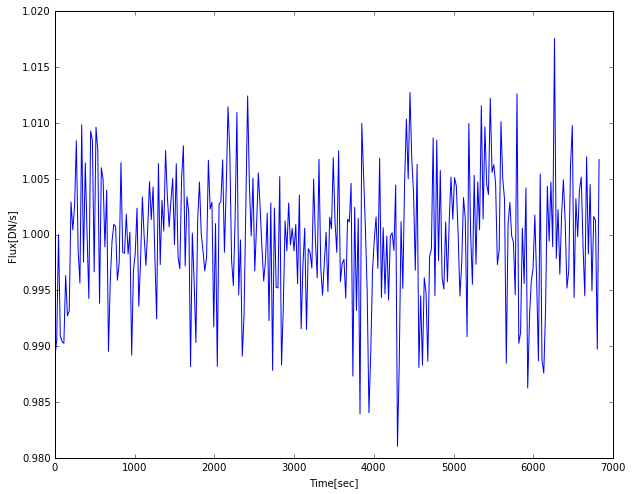

In [20]:
# A more accurate A1 time series
x2 = fixed_center_rad['Time']
y2 = fixed_center_rad['Flux']
first_data_plot = plt.plot(x2, y2/np.median(y2))
plt.xlabel('Time[sec]')
plt.ylabel('Flux[DN/s]')

In [21]:
# Calculate error (first data set)
gain = 2.2
errors_DNps = (np.sqrt((single_rad_data['Flux'])*header['INTTIME']*gain))/(gain*header['INTTIME'])
errors_normalized = errors_DNps/single_rad_data['Flux']
errors_normalized

0.000113748445067
0.00011368519169
0.000113375090257
0.000113652026841
0.000113675730941
0.000113688539497
0.000113536715448
0.000113658595957
0.000113615504673
0.000113293816534
0.000113403487263


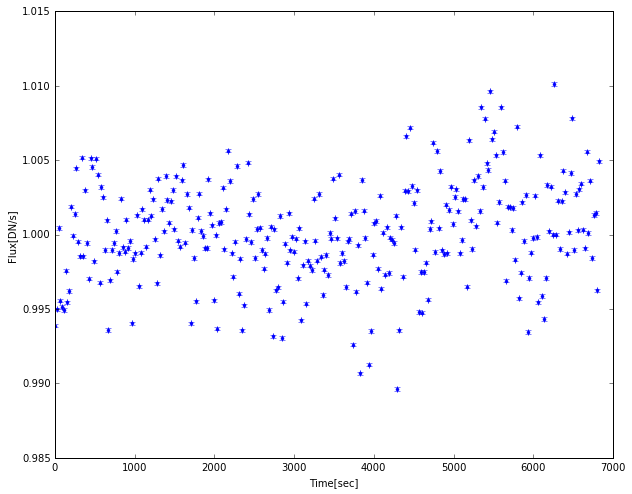

In [22]:
# Light curve of first data set with error bars
x = single_rad_data['Time']
y = single_rad_data['Flux']
plt.errorbar(x, y/np.median(y), xerr = 0, yerr = errors_normalized, fmt='.')
plt.xlabel('Time[sec]')
plt.ylabel('Flux[DN/s]')

#Generating white noise
# sigma = errors.mean()
# med = np.median(y)
# white = np.random.normal(med,sigma,y.size)
# plt.plot(x,white, 'o')

In [23]:
#Background Subtraction (Circular annulus)
aperture = CircularAperture(center, r = 80)
annular_apperture =CircularAnnulus(center, r_in = 90, r_out = 100)
rawflux_table = aperture_photometry(image2d, aperture, mask = mask)
bkgflux_table = aperture_photometry(image2d, annular_apperture, mask = mask)
phot_table = hstack([rawflux_table, bkgflux_table], table_names = ['raw','bkg'])

In [24]:
#Finding total Bkg within the circular apperture (not annular) and subtracting it from the data
bkg_mean = phot_table['aperture_sum_bkg']/annular_apperture.area()
bkg_sum = bkg_mean*aperture.area()
final_sum = phot_table['aperture_sum_raw'] - bkg_sum
phot_table['residual_aperture_sum'] = final_sum
phot_table

aperture_sum_raw,xcenter_raw [1],ycenter_raw [1],aperture_sum_bkg,xcenter_bkg [1],ycenter_bkg [1],residual_aperture_sum
,,,,,,
float64,float64,float64,float64,float64,float64,float64
3521094.60772,167.0,161.0,14215.4289689,167.0,161.0,3473211.05751


In [25]:
#Radius testing to find the best combination
#Multiple images
r_source = np.arange(20,90,10)
r_inner = np.arange(70,130,10)
r_outer = np.arange(90,150,10)
flux_and_parameters = Table(names=('residual_aperture_sum', 'r_source', 'r_in','r_out'))
for hdus in hdu_filenames:
    hdu = fits.open(hdus)
    image = hdu[0].data
    image2d = image[0,:,:]
    mask = np.isnan(image2d) == True
    for r in r_source:
        for r_in in r_inner:
            for r_out in r_outer:
                if (r<r_in) and (r<r_out) and (r_in<r_out):
                    aperture = CircularAperture(center, r)
                    annular_apperture =CircularAnnulus(center, r_in, r_out)
                    rawflux_table = aperture_photometry(image2d, aperture, mask = mask)
                    bkgflux_table = aperture_photometry(image2d, annular_apperture, mask = mask)
                    phot_table = hstack([rawflux_table, bkgflux_table], table_names = ['raw','bkg'])
                    bkg_mean = phot_table['aperture_sum_bkg']/annular_apperture.area()
                    bkg_sum = bkg_mean*aperture.area()
                    final_sum = phot_table['aperture_sum_raw'] - bkg_sum
                    phot_table['residual_aperture_sum'] = final_sum
                    flux_and_parameters.add_row([final_sum,r,r_in,r_out])
flux_and_parameters

residual_aperture_sum,r_source,r_in,r_out
float64,float64,float64,float64
221912.079255,20.0,70.0,90.0
223920.375435,20.0,70.0,100.0
225071.092595,20.0,70.0,110.0
225806.858333,20.0,70.0,120.0
226301.360074,20.0,70.0,130.0
226647.946323,20.0,70.0,140.0
225309.671387,20.0,80.0,90.0
226361.584016,20.0,80.0,100.0
226915.728847,20.0,80.0,110.0


In [26]:
#Generating median flux and standard deviation at each r_source
s1 = Table(names=('Median_Res_Flux','St_Dev', 'r_source','r_in','r_out'))
for r in r_source:
    for r_in in r_inner:
        for r_out in r_outer:
            if (r<r_in) and (r<r_out) and (r_in<r_out):
                indices = flux_and_parameters['r_source'] == r
                st_dev = np.std(flux_and_parameters["residual_aperture_sum"][indices])
                median_flux = np.median(flux_and_parameters["residual_aperture_sum"][indices])
                s1.add_row([median_flux,st_dev,r,r_in,r_out])
s1

Median_Res_Flux,St_Dev,r_source,r_in,r_out
float64,float64,float64,float64,float64
227505.757974,1772.05779947,20.0,70.0,90.0
227505.757974,1772.05779947,20.0,70.0,100.0
227505.757974,1772.05779947,20.0,70.0,110.0
227505.757974,1772.05779947,20.0,70.0,120.0
227505.757974,1772.05779947,20.0,70.0,130.0
227505.757974,1772.05779947,20.0,70.0,140.0
227505.757974,1772.05779947,20.0,80.0,90.0
227505.757974,1772.05779947,20.0,80.0,100.0
227505.757974,1772.05779947,20.0,80.0,110.0


In [27]:
#Finding the best combination
norm_std_dev = s1['St_Dev']/s1['Median_Res_Flux']
r1 = s1['r_source']
r_in1 = s1['r_in']
r_out1 = s1['r_out']
min_std_dev = np.amin(norm_std_dev)
best_r = r1[norm_std_dev.argmin()]
best_r_in = r_in1[norm_std_dev.argmin()]
best_r_out = r_out1[norm_std_dev.argmin()]
print "The minimum Standard deviation is %f" % min_std_dev
print "It occurs for the radius r = %f" % best_r
print "It occurs for the inner radius r_in = %f" % best_r_in
print "It occurs for the outer radius r_out = %f" % best_r_out

The minimum Standard deviation is 0.001998
It occurs for the radius r = 80.000000
It occurs for the inner radius r_in = 90.000000
It occurs for the outer radius r_out = 100.000000


In [28]:
# **Everything above this line is for 1ST DATA SET, 1ST IMAGE PLANE**
# Everything below: 1st data set, 2nd image plane (error stuff)

In [29]:
#Calculate Aperture sum error with the 2nd image plane
center = (167,161)
t_2 = Table(names=('Flux','Time','Aperture_sum_err'))
for hdus in hdu_filenames:
    hdu = fits.open(hdus)
    image = hdu[0].data
    error2d = image[1]
    mask = np.isnan(image2d) == True
    aperture = CircularAperture(center, r = 39)
    phot_table = aperture_photometry(image2d, aperture, error = error2d, mask = mask)
    header = hdu[0].header
    time = [(header["NGROUP"] + 1) * header["TGROUP"] * (header["ON_NINT"] - 1)]
    a = [phot_table[0][0]]
    b = time
    c = [phot_table[0][1]]
    t_2.add_row([a,b,c])
    hdu.close()
t_2

Flux,Time,Aperture_sum_err
float64,float64,float64
1666527.75168,0.0,83.4655937376
1666527.75168,22.38012,76.0029935567
1666527.75168,44.76024,76.9844643822
1666527.75168,67.14036,69.7287223847
1666527.75168,89.52048,80.297408936
1666527.75168,111.9006,85.3302542416
1666527.75168,134.28072,83.785630409
1666527.75168,156.66084,80.1103796995
1666527.75168,179.04096,72.7124498198


In [30]:
# Compare error by previous method to this one
err_comparison_table = Table(names = ('Error by formula','Error by image plane'))
for index in range(306):
    err_comparison_table.add_row([errors_normalized[index],t_2['Aperture_sum_err'][index]])
err_comparison_table

Error by formula,Error by image plane
float64,float64
0.000113748445067,83.4655937376
0.00011368519169,76.0029935567
0.000113375090257,76.9844643822
0.000113652026841,69.7287223847
0.000113675730941,80.297408936
0.000113688539497,85.3302542416
0.000113536715448,83.785630409
0.000113658595957,80.1103796995
0.000113615504673,72.7124498198


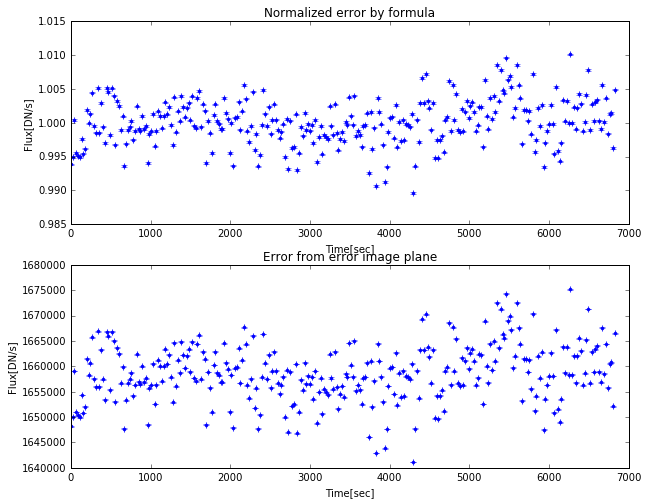

In [31]:
plt.subplot(2,1,1)
x = single_rad_data['Time']
y = single_rad_data['Flux']
plt.errorbar(x, y/np.median(y), xerr = 0, yerr = errors_normalized, fmt='.')
plt.xlabel('Time[sec]')
plt.ylabel('Flux[DN/s]')
plt.title('Normalized error by formula')

plt.subplot(2,1,2)
x = single_rad_data['Time']
y = single_rad_data['Flux']
plt.errorbar(x, y, xerr = 0, yerr = t_2['Aperture_sum_err'], fmt='.')
plt.xlabel('Time[sec]')
plt.ylabel('Flux[DN/s]')
plt.title('Error from error image plane')

In [32]:
# **Everything above this line is 1ST DATA SET, 2ND IMAGE PLANE**
# Everything below: 2nd data set, 1st image plane 

In [33]:
#Importing second data set
hdu_filenames_b4 = glob.glob('//data//External//ISIMCV3_unzipped//NRCN821//fitsfilesonly//raw_separated_MMM//NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29//*slp.fits')
hdu_filenames_b4

['//data//External//ISIMCV3_unzipped//NRCN821//fitsfilesonly//raw_separated_MMM//NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29/NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29_I001.slp.fits',
 '//data//External//ISIMCV3_unzipped//NRCN821//fitsfilesonly//raw_separated_MMM//NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29/NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29_I002.slp.fits',
 '//data//External//ISIMCV3_unzipped//NRCN821//fitsfilesonly//raw_separated_MMM//NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29/NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29_I003.slp.fits',
 '//data//External//ISIMCV3_unzipped//NRCN821//fitsfilesonly//raw_separated_MMM//NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29/NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29_I004.slp.fits',
 '//data//External//ISIMCV3_unzipped//NRCN821//fitsfilesonly//raw_separated_MMM//NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29/NRCN821WLP8SUB-6012134957_1_489_SE_2

In [34]:
#Generate flux & time of each image for all aperture radii (second data set)
center = (161,163)
t_new = Table(names=('Flux','Time','Aperture Radius'))
for hdus_new in hdu_filenames_b4:
    hdu_new = fits.open(hdus_new)
    image_new = hdu_new[0].data
    image2d_new = image_new[0,:,:]
    mask = np.isnan(image2d_new) == True
    radius = np.arange(5,200,1)
    for r in radius:
        aperture = CircularAperture(center, r)
        phot_table = aperture_photometry(image2d_new, aperture, mask = mask)
        header_new = hdu_new[0].header
        time = [(header_new["NGROUP"] + 1) * header_new["TGROUP"] * (header_new["ON_NINT"] - 1)]
        a = [phot_table[0][0]]
        b = time
        c = r
        t_new.add_row([a,b,c])
    hdu_new.close()
t_new

Flux,Time,Aperture Radius
float64,float64,float64
9680.04841156,0.0,5.0
14647.9093,0.0,6.0
21307.1082671,0.0,7.0
29283.3450498,0.0,8.0
38705.2276883,0.0,9.0
49923.7302049,0.0,10.0
62829.8840877,0.0,11.0
77740.2783386,0.0,12.0
95761.2279251,0.0,13.0


In [35]:
# Second data set
# Generate Standard deviation of all images for each aperture radii
# Generate Median flux of all images for each aperture radii (so that you can normalize standard deviation)
s_new = Table(names=('Median_Flux','St_Dev', 'Ap_Rad'))
for r in radius:
    indices = t_new['Aperture Radius'] == r
    st_dev = np.std(t_new["Flux"][indices])
    median_flux = np.median(t_new["Flux"][indices])
    s_new.add_row([median_flux,st_dev,r])
s_new

Median_Flux,St_Dev,Ap_Rad
float64,float64,float64
9695.35025107,97.953254362,5.0
14680.7198569,156.524170305,6.0
21332.694423,171.998815582,7.0
29294.8154652,153.337328992,8.0
38637.8696221,302.210829707,9.0
49796.6207832,460.944437697,10.0
62679.0121746,625.135313594,11.0
77569.1278329,783.328853398,12.0
95605.1083078,1008.765012,13.0


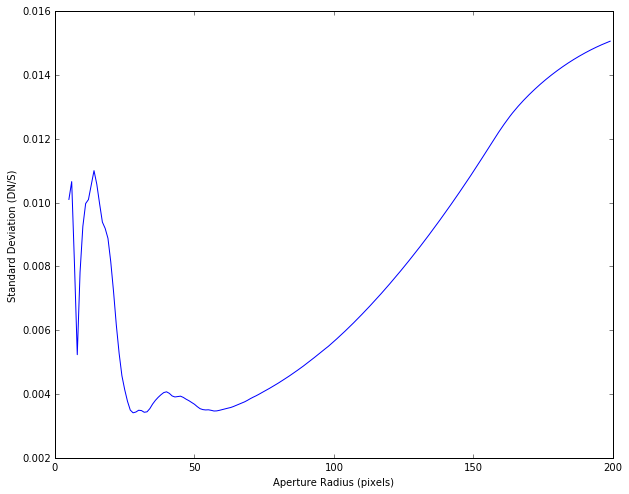

In [36]:
# Plot normalized standard deviation (second data set)
u_new = s_new['Ap_Rad']
v_new = s_new['St_Dev']/s_new['Median_Flux']
plt.plot(u_new, v_new)
plt.ylabel('Standard Deviation (DN/S)')
plt.xlabel('Aperture Radius (pixels)')

In [37]:
# Find minimum deviation and the corresponding aperture radius (second data set)
min_stdev = np.amin(v_new)
best_ap_rad = u_new[v_new.argmin()]
print "The minimum standard deviation is %f" % min_stdev
print "It occurs for the radius r = %f" % best_ap_rad

The minimum standard deviation is 0.003411
It occurs for the radius r = 28.000000


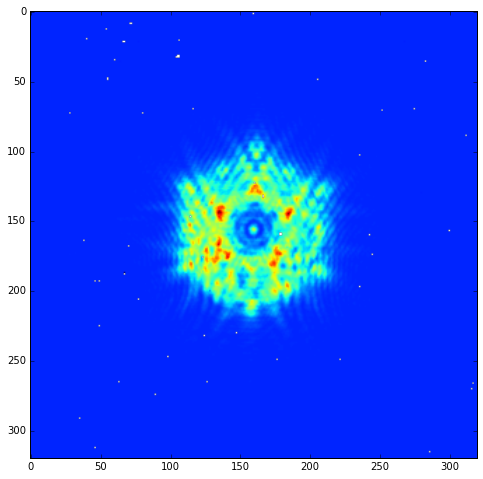

In [38]:
plt.imshow(image2d_new) #Second data set 

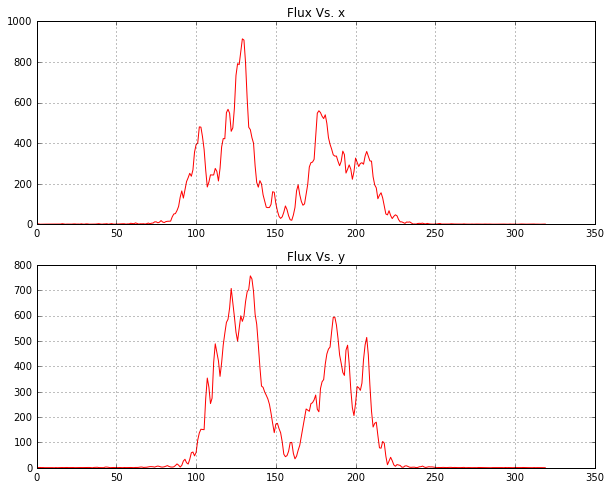

In [39]:
# Figuring out the center for image2d_new
plt.subplot(2,1,1)
plt.title("Flux Vs. x")
plt.plot(image2d_new[:,163],'r-')
plt.grid(True)
plt.subplot(2,1,2)
plt.title("Flux Vs. y")
plt.plot(image2d_new[161,:],'r-')
plt.grid(True)

In [40]:
#Flux Vs. time for best ap_rad, 2nd data set, 1st image plane
center = (161,163)
single_new = Table(names=('Flux','Time'))
for hdus_new in hdu_filenames_new:
    hdu_new = fits.open(hdus_new)
    image_new = hdu_new[0].data
    image2d_new = image_new[0,:,:]
    mask = np.isnan(image2d_new) == True
    aperture = CircularAperture(center, r = 60)
    phot_table = aperture_photometry(image2d_new, aperture, mask = mask)
    header_new = hdu_new[0].header
    time = [(header_new["NGROUP"] + 1) * header_new["TGROUP"] * (header_new["ON_NINT"] - 1)]
    a = [phot_table[0][0]]
    b = time
    single_new.add_row([a,b])
    hdu_new.close()
single_new

NameError: name 'hdu_filenames_new' is not defined

In [ ]:
x_new = single_new['Time']
y_new = single_new['Flux']
second_data_plot = plt.plot(x_new, y_new/np.median(y_new), 'r-')
plt.xlabel('Time[sec]')
plt.ylabel('Flux[DN/s]')

In [ ]:
# **Everything above this line is 2ND DATA SET, 1ST IMAGE PLANE**
# Everything below: Comparisons

In [ ]:
plt.plot(x, y/np.median(y), '.-')  # The data set I have been working on (blue)
plt.plot(x_new, y_new/np.median(y_new), 'r.-')  # The new data set (red)

In [ ]:
# Light curve with errorbars
plt.errorbar(x, y/np.median(y), xerr = 0, yerr = errors_normalized, fmt='.') # 1st data set, 1st image plane -> Blue
plt.errorbar(x_2, y_2/np.median(y_2), xerr = 0, yerr = errors_normalized_2, fmt='g.') # 1st data set, 2nd image plane -> Green

In [ ]:
# *** Testing my library of functions***

In [ ]:
import rafias_lib as rl
data = rl.time_series(167, 161, 39, hdu_filenames)
data

In [ ]:
reload(rafias_lib)

In [ ]:
plot = rl.light_curve(data['Time'], data['Flux'], 0, 0, '.')

In [ ]:
rl.rms_vs_bin(data['Time'], data['Flux'], 1, 77, 1, 306, 'b-')

In [ ]:
rl.norm_flux_error(data['Flux'], 2.2, header)

In [1]:
range(0,8)

[0, 1, 2, 3, 4, 5, 6, 7]